# Analisi del file CSV person_alternate_names

## Analisi

Analizzando il file notiamo come contenga una lista di nomi di persone.

In [2]:
import pandas as pd
personAN_df = pd.read_csv('person_alternate_names.csv')
personAN_df.head()

,person_mal_id,alt_name
0,1,Seki Mondoya
1,1,門戸 開
2,1,Monto Hiraku
3,3,雪野五月
4,10,Kevin Hatcher


Preso songolarmante non è molto chiaro a cosa corrisponda il person_mal_id, alcune volte un singolo id corrisponde ad una perona (una persona può avere piu nomi) ma altre volte l'id corrisponde a persone diverse (es id 12). Non è un file molto utile perchè contiene solo tutti i nomi di attori, musicisti ecc.

# Analisi del file CSV person_anime_works
## Analisi
Analizzando il file notiamo come contenga tutti i ruoli delle persone (presenti nel CSV precedente) e a quale anime id corrisponde.

In [7]:
personAW_df = pd.read_csv('person_anime_works.csv')
personAW_df.head()

,person_mal_id,position,anime_mal_id
0,1,Theme Song Performance,3080
1,1,Inserted Song Performance,15699
2,1,Theme Song Performance (OP),247
3,1,Theme Song Performance,258
4,1,Theme Song Performance (ED),34825


Si potrebbe visualizzare quali ruoli sono più necessari o presenti per la realizzazione degli anime

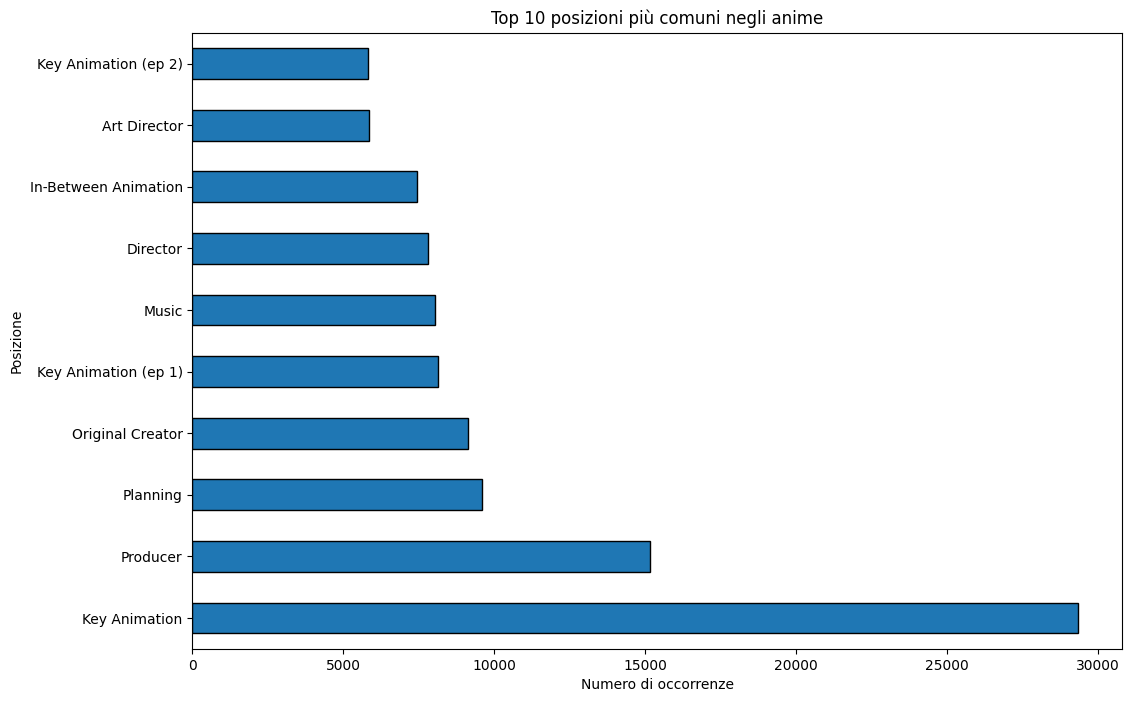

In [8]:
# Grafico delle posizioni più comuni (top 10)
plt.figure(figsize=(12, 8))
personAW_df['position'].value_counts().head(10).plot(kind='barh', edgecolor='black')
plt.title('Top 10 posizioni più comuni negli anime')
plt.xlabel('Numero di occorrenze')
plt.ylabel('Posizione')
plt.show()

Si può vedere le posizioni più comuni drante la realizzazione degli anime (non so quanto sia utile).

# Analisi del file CSV person_details
## Analisi
Analizzando il file notiamo come contenga una serie di informazioni relative ad una persona, come i vari nomi, la data di compleanno, da dove proviene, una foto ecc.

In [3]:
personD_df = pd.read_csv('person_details.csv')
personD_df.head()

,person_mal_id,url,website_url,image_url,name,given_name,family_name,birthday,favorites,relevant_location
0,1,https://myanimelist.net/people/1/Tomokazu_Seki,NaN,https://cdn.myanimelist.net/images/voiceactors...,Tomokazu Seki,智一,関,1972-09-08T00:00:00+00:00,6219,"Berlin, Germany"
1,2,https://myanimelist.net/people/2/Tomokazu_Sugita,https://agrs.co.jp/,https://cdn.myanimelist.net/images/voiceactors...,Tomokazu Sugita,智和,杉田,1980-10-11T00:00:00+00:00,47666,"Los Angeles, USA"
2,3,https://myanimelist.net/people/3/Satsuki_Yukino,NaN,https://cdn.myanimelist.net/images/voiceactors...,Satsuki Yukino,さつき,ゆきの,1970-05-25T00:00:00+00:00,1777,"Madrid, Spain"
3,4,https://myanimelist.net/people/4/Aya_Hirano,http://ayahirano.jp/,https://cdn.myanimelist.net/images/voiceactors...,Aya Hirano,綾,平野,1987-10-08T00:00:00+00:00,18374,"Paris, France"
4,5,https://myanimelist.net/people/5/Kenichi_Suzumura,https://intention-k.com,https://cdn.myanimelist.net/images/voiceactors...,Kenichi Suzumura,健一,鈴村,1974-09-12T00:00:00+00:00,5176,"Osaka, Japan"


E' abbastanza utile per porsi qualche domanda, come per esempio vedere la concentrazione di persone nate in determinati periodi (utile per trend generazionali). Oppure vedere i paesi più rappresentati per analizzare la distribuzione geografica.

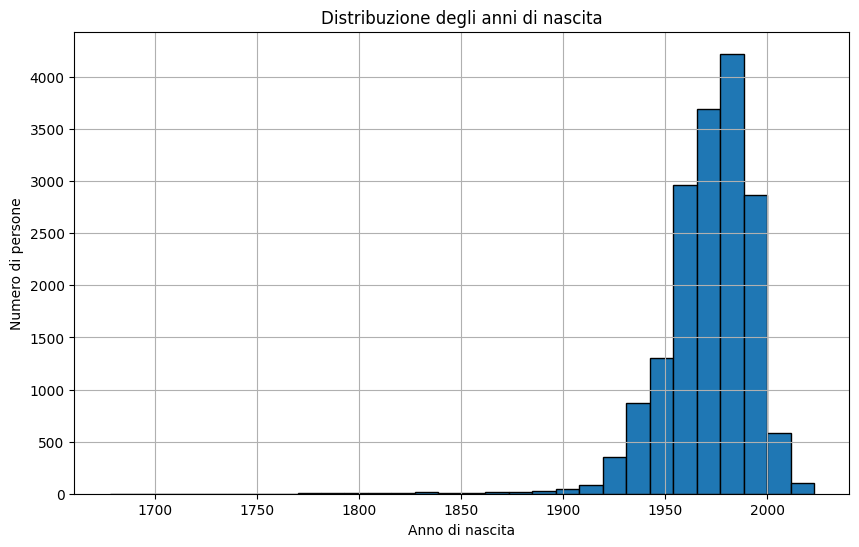

In [ ]:
import matplotlib.pyplot as plt

# Estrarre l'anno di nascita
personD_df['birth_year'] = pd.to_datetime(personD_df['birthday'], errors='coerce').dt.year

# Grafico
plt.figure(figsize=(10, 6))
personD_df['birth_year'].dropna().hist(bins=30, edgecolor='black')
plt.title('Distribuzione degli anni di nascita')
plt.xlabel('Anno di nascita')
plt.ylabel('Numero di persone')
plt.show()

Possimao notare come la conentrazione delle nascite è avvenuta nella seconda metà degli anni 50. Da qui si può anche supporre che il boom degli anime è avvenuto poco prima degli anni 2000.

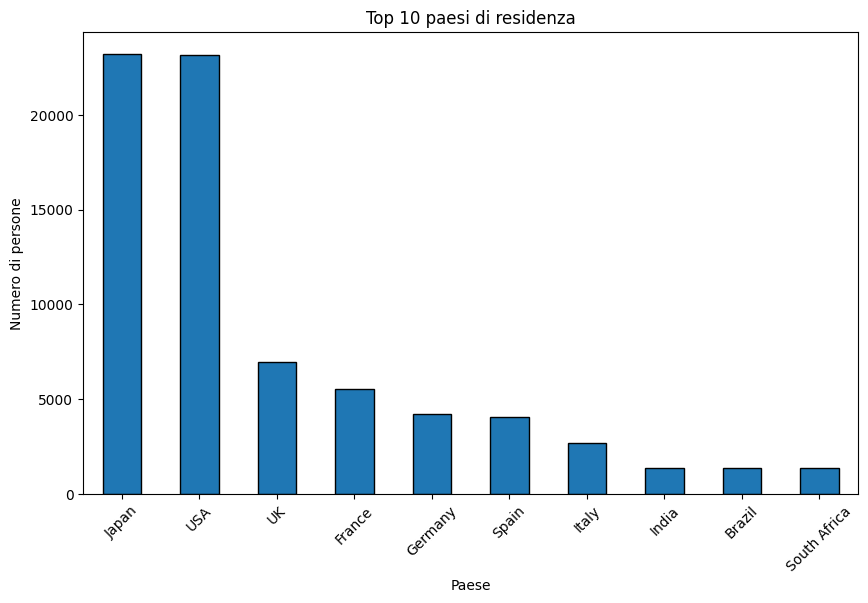

In [ ]:
# Estrarre il paese da relevant_location
personD_df['country'] = personD_df['relevant_location'].str.split(',').str[-1].str.strip()

# Grafico (top 10)
plt.figure(figsize=(10, 6))
personD_df['country'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 paesi di residenza')
plt.xlabel('Paese')
plt.ylabel('Numero di persone')
plt.xticks(rotation=45)
plt.show()

Da questo grafico invece possiamo capire le perosne da quali paesi principalmente sono nate e possiamo dire con certezza che il giappone e gli stati uniti hanno un netto distacco rispetto agli altri paesi (l'italia è 7° nel mondo).

# Analisi del file CSV person_voice_works
## Analisi
Analizzando il file notiamo come contenga dei dati riguardanti determinate perosone, ovvero il ruolo del perosnaggio che hanno doppiato e in che lingua.

In [10]:
personVW_df = pd.read_csv('person_voice_works.csv')
personVW_df.head()

,person_mal_id,role,anime_mal_id,character_mal_id,language
0,1,Main,55830,2514,Japanese
1,1,Supporting,60602,2822,Japanese
2,1,Supporting,59229,140499,Japanese
3,1,Supporting,60427,275856,Japanese
4,1,Supporting,62067,190335,Japanese


Da quetso file possiamo chiederci in quali lingue vengono doppiati di più i personaggi

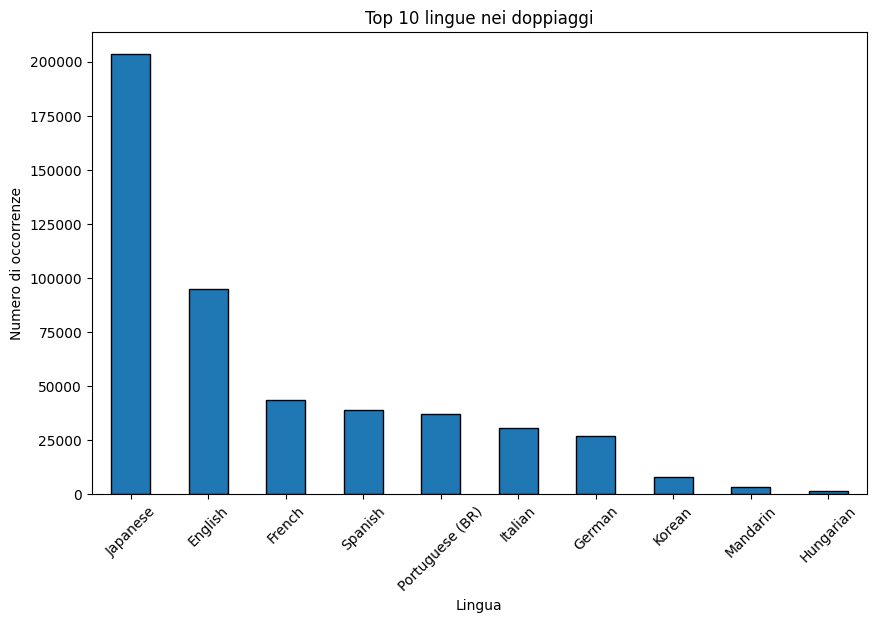

In [11]:
# Grafico delle lingue più comuni nei doppiaggi
plt.figure(figsize=(10, 6))
personVW_df['language'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 lingue nei doppiaggi')
plt.xlabel('Lingua')
plt.ylabel('Numero di occorrenze')
plt.xticks(rotation=45)
plt.show()

Da questo grafico possiamo notare i doppiaggi in quali lingue sono state effetuete, il giappone è sempre in cima alla classifica, però si può notare anche che le posizioni dei paesi rispecchiano abbastanza quelle presente nel precedente csv.

# Analisi del file CSV ratings
## Analisi
Analizzando il file notiamo come contenga una lista di tutti gli anime e alcuni dati interessanti come lo stato, la valutazione, e quanti episodi hanno.

In [14]:
# Lettura del file in chunk per gestire la memoria
chunk_size = 10000
ratings_chunks = pd.read_csv('ratings.csv', chunksize=chunk_size)
ratings_df = next(ratings_chunks)  # Prendi solo il primo chunk per vedere la struttura
ratings_df.head()

,username,anime_id,status,score,is_rewatching,num_watched_episodes
0,--------788,30276,watching,7,0.0,3
1,--------788,28851,completed,7,0.0,1
2,--------788,41168,completed,7,0.0,1
3,--------788,22199,completed,10,0.0,24
4,--------788,16498,completed,10,0.0,25


Il file è veramente grande, abbiamo preso solo un chunk di 10.000 righe per farci un'idea dei dati presenti nel csv. Da questi dati possiamo farci delle domande interessanti, come per esempio quanti anime sono stati completati, la distribuzione delle valutazioni oppure quanti episodi hanno in media gli anime. Si potrebbero fare analisi più complesse del tipo gli anime con valiutazione più alta quanti episodi hanno in media e molti altri.

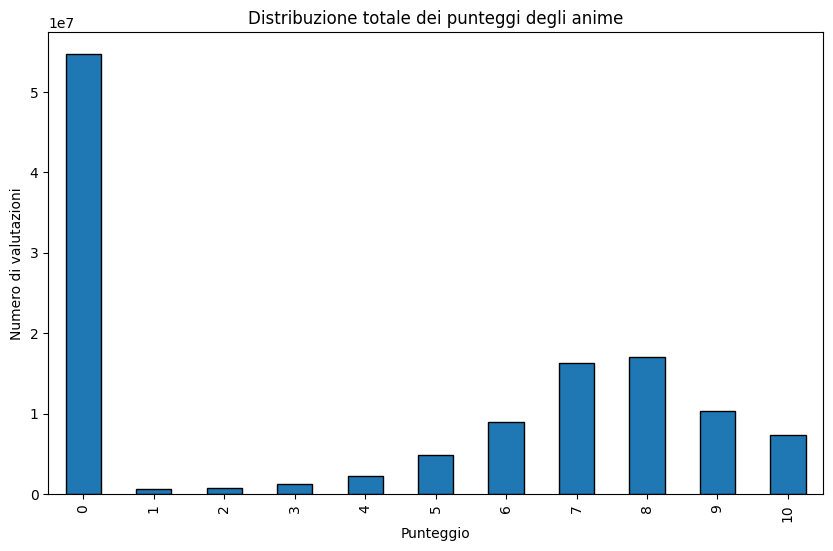

In [16]:
# Analisi completa del file in chunk per distribuzione dei punteggi
chunk_size = 100000  # Chunk più grandi per efficienza
score_counts = pd.Series(dtype=int)

for chunk in pd.read_csv('ratings.csv', chunksize=chunk_size):
    chunk_counts = chunk['score'].value_counts()
    score_counts = score_counts.add(chunk_counts, fill_value=0)

# Grafico della distribuzione totale
plt.figure(figsize=(10, 6))
score_counts.sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribuzione totale dei punteggi degli anime')
plt.xlabel('Punteggio')
plt.ylabel('Numero di valutazioni')
plt.show()

Qui abbiamo la distrubuzione delle valutazioni degli anime. Da questo grafico possimao notare come moltissimi anime non hanno una valutazione, ma generalmente la media si aagira tra il 7 e l'8. Nota: abbiamo analizzato tutto il file, soltanto che lo abbiamo diviso in chunk poichè essendo troppo grande ci dava errore in memoria.

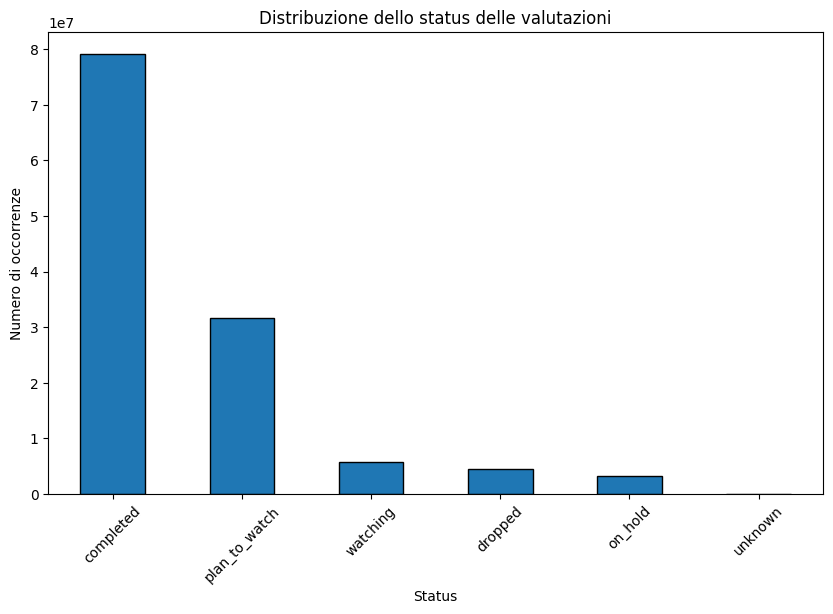

In [17]:
# Analisi completa per distribuzione dello status
chunk_size = 100000
status_counts = pd.Series(dtype=int)

for chunk in pd.read_csv('ratings.csv', chunksize=chunk_size):
    chunk_counts = chunk['status'].value_counts()
    status_counts = status_counts.add(chunk_counts, fill_value=0)

# Grafico della distribuzione dello status
plt.figure(figsize=(10, 6))
status_counts.sort_values(ascending=False).plot(kind='bar', edgecolor='black')
plt.title('Distribuzione dello status delle valutazioni')
plt.xlabel('Status')
plt.ylabel('Numero di occorrenze')
plt.xticks(rotation=45)
plt.show()

Da questo grafico possiamo vedere lo status degli anime, e come possiamo vedere sono stati principalmene completati. Però non saprei quanto possa essere attendibile perchè magari qualcuno non ha aggiornato lo status e quindi potrebbero essere di più quelli completati, può essere che qualcuno metta lo status "plan_to_watch" e poi per pigrizia non va a modificare lo status una volta visto.

# Analisi del file CSV recommendations
## Analisi
Analizzando il file notiamo come contenga due id ma non ho ben capito a cosa si riferisce, presumo utenti e anime.

In [19]:
recommendations_df = pd.read_csv('recommendations.csv')
recommendations_df.head()

,mal_id,recommendation_mal_id
0,3269,317
1,3269,6922
2,3269,299
3,3269,3446
4,3269,5681


Non mi sembra un csv molto utile preso singolarmente ma magari si potrebbe risalire per esempio a quali anime sono i più raccomandati.

# Analisi del file CSV details
## Analisi
Analizzando il file notiamo come contenga delle informazioni riguardanti gli anime, per esempio il titolo, il tipo, la copertina, lo status, lo score e molto altro. E' un csv molto interessante probabilmente il più interessante di tutta questa analisi.

In [29]:
details_df = pd.read_csv('details.csv')
pd.set_option('display.max_columns', None)
details_df.head()

,mal_id,title,title_japanese,url,image_url,type,status,score,scored_by,start_date,end_date,synopsis,rank,popularity,members,favorites,genres,studios,themes,demographics,source,rating,episodes,season,year,producers,explicit_genres,licensors,streaming
0,59356,-Socket-,-socket-,https://myanimelist.net/anime/59356/-Socket-,https://cdn.myanimelist.net/images/anime/1043/...,Movie,Finished Airing,NaN,NaN,2010-01-01T00:00:00+00:00,NaN,A girl with a cord growing out of her back wan...,17086.0,22507,195,0,['Comedy'],[],[],[],Original,G - All Ages,1.0,NaN,NaN,['Nagoya Zokei University'],[],[],[]
1,56036,......,......,https://myanimelist.net/anime/56036/-,https://cdn.myanimelist.net/images/anime/1057/...,Music,Finished Airing,6.53,503.0,2023-06-11T00:00:00+00:00,NaN,Music video directed by obmolot for the song ....,NaN,15004,941,2,"['Horror', 'Supernatural']",['Flat Studio'],['Music'],[],Original,PG-13 - Teens 13 or older,1.0,NaN,NaN,[],[],[],[]
2,2928,.hack//G.U. Returner,.HACK//G.U. RETURNER,https://myanimelist.net/anime/2928/hack__GU_Re...,https://cdn.myanimelist.net/images/anime/1798/...,OVA,Finished Airing,6.65,9745.0,2007-01-18T00:00:00+00:00,NaN,The characters from previous .hack//G.U. Games...,6366.0,5056,22525,31,"['Adventure', 'Drama', 'Fantasy']",['Bee Train'],['Video Game'],[],Game,PG-13 - Teens 13 or older,1.0,NaN,NaN,"['Bandai Visual', 'CyberConnect2']",[],[],[]
3,3269,.hack//G.U. Trilogy,.hack//G.U. Trilogy,https://myanimelist.net/anime/3269/hack__GU_Tr...,https://cdn.myanimelist.net/images/anime/1566/...,Movie,Finished Airing,7.06,15373.0,2007-12-22T00:00:00+00:00,NaN,"Based on the CyberConnect2 HIT GAME, now will ...",4194.0,4215,34264,104,"['Action', 'Fantasy']",['CyberConnect2'],['Video Game'],[],Game,PG-13 - Teens 13 or older,1.0,NaN,NaN,['Bandai Visual'],[],"['Funimation', 'Bandai Entertainment']",[]
4,4469,.hack//G.U. Trilogy: Parody Mode,.hack//G.U. Trilogy,https://myanimelist.net/anime/4469/hack__GU_Tr...,https://cdn.myanimelist.net/images/anime/10/86...,Special,Finished Airing,6.35,4317.0,2008-03-25T00:00:00+00:00,NaN,A special bonus Parody Mode added to the extra...,8182.0,6696,11135,10,"['Comedy', 'Fantasy', 'Sci-Fi']",[],"['Parody', 'Video Game']",[],Game,PG-13 - Teens 13 or older,1.0,NaN,NaN,['Bandai Visual'],[],[],[]


Vedendo questi dati risulta interessante sapere quali tipi di anime sono i più diffusi (es movie, seerie tv ecc), la distribuzione dei punteggi degli anime per farci una stima se generalmete sono apprezzati e anche sapere lo status degli anime. Un dato particolare è il numero degli episodi però non credo serva fare un grafico per vedere una media poichè ci sono molti titoli da un solo episodio oppure altri che ne hanno anche più di 1000. Però volendo si potrebbe vedere una cosa molto interessante, ovvero se le serie TV hanno principlamente una sola stagione o molteplici (non è possibile con questi dati). Invece si potrebbe capire quali studi di produzione fanno più anime.

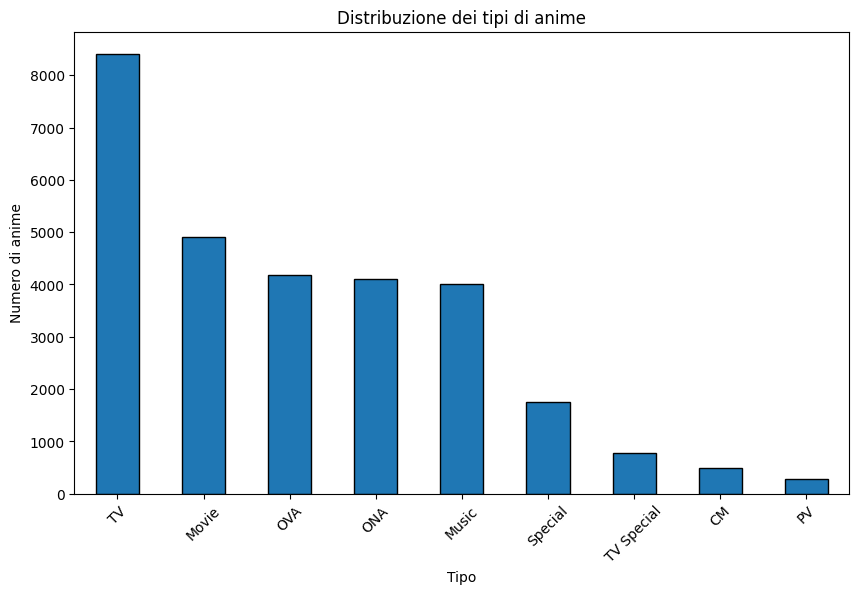

In [22]:
# Distribuzione dei tipi di anime
plt.figure(figsize=(10, 6))
details_df['type'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribuzione dei tipi di anime')
plt.xlabel('Tipo')
plt.ylabel('Numero di anime')
plt.xticks(rotation=45)
plt.show()

Come possimo vedere le serie TV rapprsentano la magior parte degli anime presenti, ma ci sono anche molti film, OVA, ONA e music (si può spiegare cosa sono)

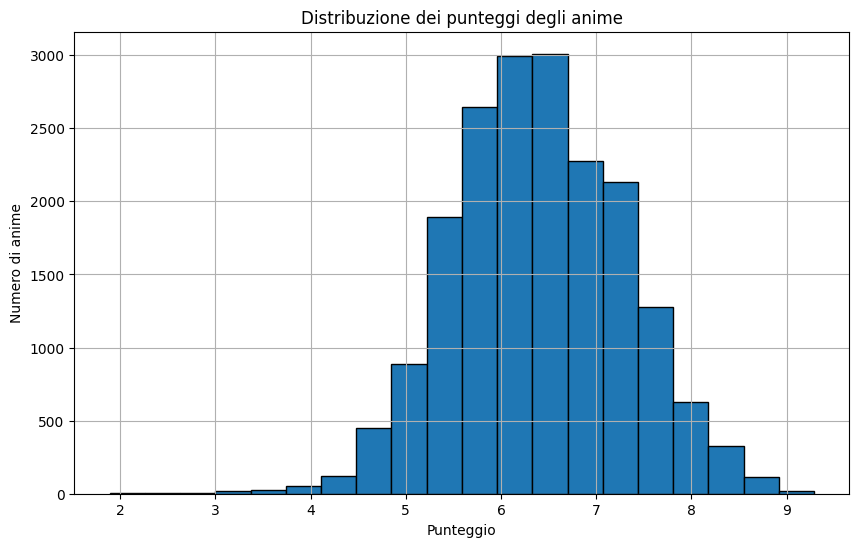

In [23]:
# Distribuzione dei punteggi degli anime
plt.figure(figsize=(10, 6))
details_df['score'].dropna().hist(bins=20, edgecolor='black')
plt.title('Distribuzione dei punteggi degli anime')
plt.xlabel('Punteggio')
plt.ylabel('Numero di anime')
plt.show()

Da questo grafico possiamo vedere la media delle valutazioni degli anime secondo il sito "myanimelist" che si aggira tra il 6 e il 7.

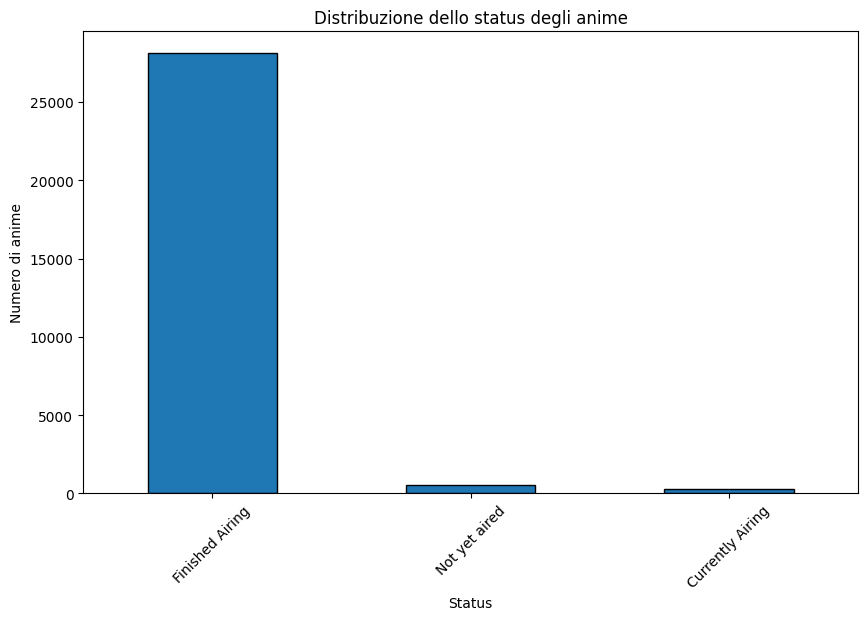

In [24]:
# Distribuzione dello status degli anime
plt.figure(figsize=(10, 6))
details_df['status'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribuzione dello status degli anime')
plt.xlabel('Status')
plt.ylabel('Numero di anime')
plt.xticks(rotation=45)
plt.show()

Da questo grafico possiamo vedere lo stato degli anime se sono gia andati in onda e finiti oppure no. Non saprei se possa essere utile però ci fa capire che ci sono più anime annunciati e che non sono in onda piuttosto che quelli che stanno andando in onda. Però i dati possono cambiare molto rapidamnete considerando che genralmnete una stagione finisce di andare in onda in una stagione. INfatti gli anime escono generalmente ogni stagione.

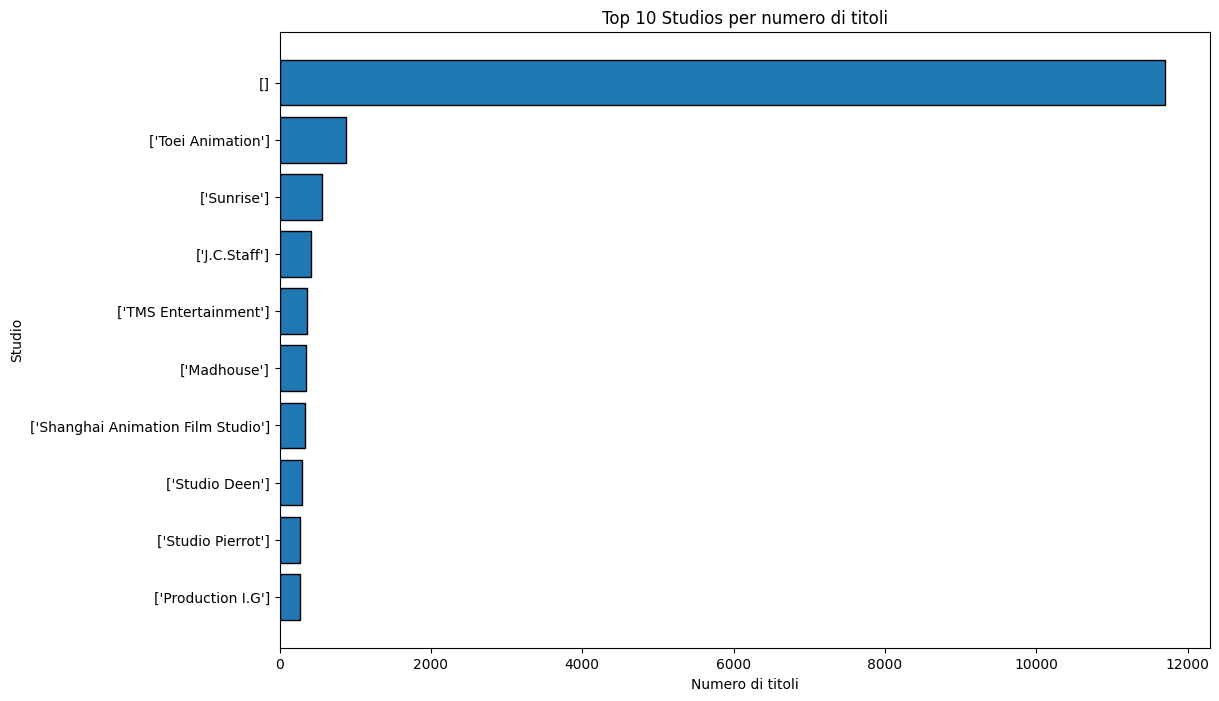

In [30]:
# Top 10 studios per numero di titoli
from collections import Counter

# Espandere la colonna studios (assumendo sia separata da virgole)
all_studios = []
for stud in details_df['studios'].dropna():
    all_studios.extend(stud.split(', '))

studio_counts = Counter(all_studios)
top_studios = studio_counts.most_common(10)

# Grafico
studios, counts = zip(*top_studios)
plt.figure(figsize=(12, 8))
plt.barh(studios, counts, edgecolor='black')
plt.title('Top 10 Studios per numero di titoli')
plt.xlabel('Numero di titoli')
plt.ylabel('Studio')
plt.gca().invert_yaxis()  # Per avere il top al top
plt.show()

Come possiamo vedere ci sono veramente tanti tiloli dove non hanno uno studio, è da capire se è una mancanza da parte del sito "myanimelist" oppure effettivamente non è presente e sono tipo delle fan animation. Però possiavìmo vedere come lo studio che ha prodotto più titoli sia "Toei Animation" ed infatti è un famosissimo studio presente in giappone (patria degli naime).

In [ ]:
# Tabella dei top 15 titoli per rank
top_ranked = details_df.sort_values('rank').head(15)[['title', 'rank']] 
top_ranked.reset_index(drop=True, inplace=True)
top_ranked.index = top_ranked.index + 1
top_ranked

,title,rank
1,Sousou no Frieren,1.0
2,Fullmetal Alchemist: Brotherhood,2.0
3,Steins;Gate,3.0
4,Shingeki no Kyojin Season 3 Part 2,4.0
5,Gintama: The Final,5.0
6,Gintama°,6.0
7,Hunter x Hunter (2011),7.0
8,One Piece Fan Letter,8.0
9,Ginga Eiyuu Densetsu,9.0
10,Gintama',10.0


Da questa tabella possiamo vedere i top10 anime più apprezzati dalla comunnity del sito "myanimelist". sembrano esserci dei dopppionni ma perche l'anime Gintama ha piu stagioni che rientrano in top10. Però possiamo dire che l'anime Gintama è sttao veramente apprezzato in tutta la sua interezza, non sempre tutte le stagioni degli anime sono apprezzate dal pubblico allo stesso modo.

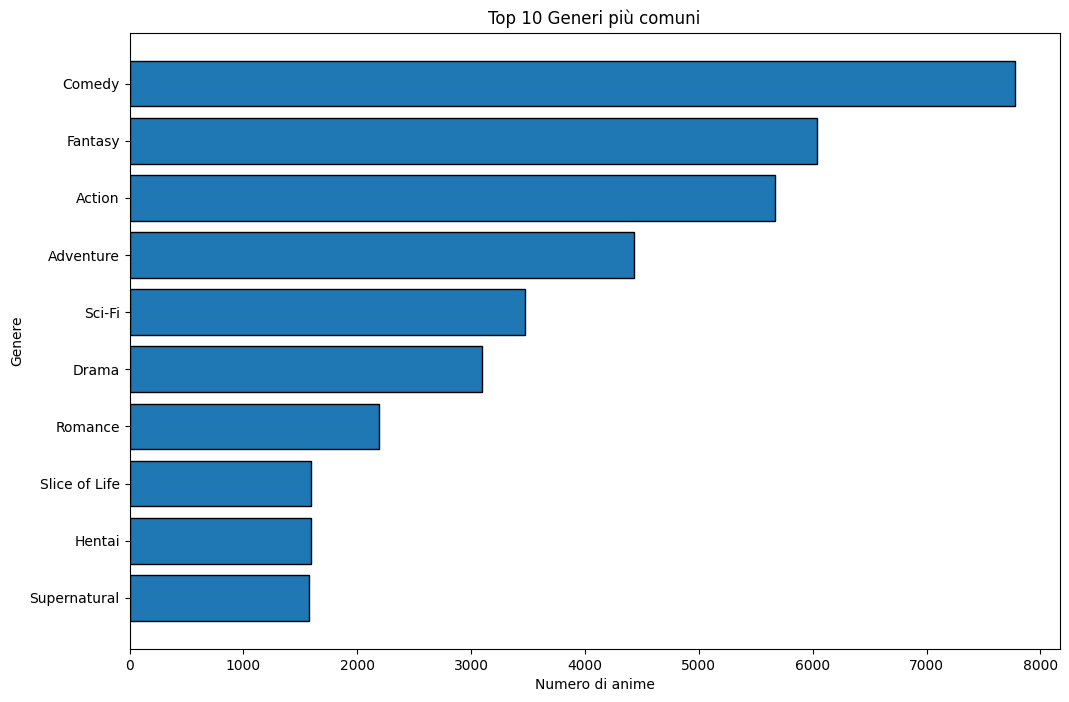

In [38]:
# Top 10 generi più comuni
from collections import Counter

# Espandere la colonna genres (assumendo sia separata da virgole)
all_genres = []
for gen in details_df['genres'].dropna():
    genres_list = gen.split(', ')
    for g in genres_list:
        cleaned = g.strip("[]'\"")  # Rimuovi parentesi quadre e virgolette
        if cleaned:  # Salta generi vuoti
            all_genres.append(cleaned)

genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

# Grafico
genres, counts = zip(*top_genres)
plt.figure(figsize=(12, 8))
plt.barh(genres, counts, edgecolor='black')
plt.title('Top 10 Generi più comuni')
plt.xlabel('Numero di anime')
plt.ylabel('Genere')
plt.gca().invert_yaxis()  # Per avere il top al top
plt.show()

Da questo grafico possiamo vedere qual è il genere più prodotto nel mondo degli anime, ovvero la commedia.